<a href="https://colab.research.google.com/github/Quang-Nguyen-Van/MSE-PYTHON/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cài đặt version 3.5.2 của Matplotlib**

In [ ]:
!pip install -U matplotlib==3.5.2
!pip install imgaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Kiểm tra version của Matplotlib. Nếu là version cũ thì reset runtime để load lại version mới được cài đặt**

In [ ]:
import matplotlib
mlt_ver = matplotlib.__version__
print(mlt_ver)

if mlt_ver != '3.5.2':
  exit()

3.5.2


In [ ]:
#!pip uninstall gdown -y && pip install gdown
!rmdir dataset
!mkdir dataset
!gdown https://drive.google.com/uc?id=17QFqGgzv5bNx8JtyXzkaHUjCXUP84XLK -O /content/dataset/train.csv


rmdir: failed to remove 'dataset': Directory not empty
mkdir: cannot create directory ‘dataset’: File exists
Downloading...
From: https://drive.google.com/uc?id=17QFqGgzv5bNx8JtyXzkaHUjCXUP84XLK
To: /content/dataset/train.csv
100% 2.13M/2.13M [00:00<00:00, 159MB/s]


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import datetime
import matplotlib.pyplot as plt
#%matplotlib inline


In [ ]:
d_frame = pd.read_csv('/content/dataset/train.csv')

In [ ]:
d_frame.isnull().sum().sort_values(ascending = False)

Postal Code      11
Row ID            0
Order ID          0
Product Name      0
Sub-Category      0
Category          0
Product ID        0
Region            0
State             0
City              0
Country           0
Segment           0
Customer Name     0
Customer ID       0
Ship Mode         0
Ship Date         0
Order Date        0
Sales             0
dtype: int64

In [ ]:
d_frame[d_frame['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [ ]:
d_frame['Postal Code'] = d_frame['Postal Code'].fillna('L7L 0A1')

In [ ]:
d_frame.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

#**Chuẩn hóa ngày tháng**

In [ ]:
d_frame['Order Date'] = pd.to_datetime(d_frame['Order Date'], format= '%d/%m/%Y')
d_frame['Ship Date'] = pd.to_datetime(d_frame['Ship Date'], format= '%d/%m/%Y')

d_frame['Ship Date'].value_counts()

2018-09-26    34
2018-12-06    32
2016-12-16    31
2018-09-15    30
2018-09-06    30
              ..
2015-07-10     1
2016-03-29     1
2016-06-14     1
2018-01-10     1
2016-05-13     1
Name: Ship Date, Length: 1326, dtype: int64

In [ ]:
pip list | grep matplotlib

matplotlib                    3.5.2
matplotlib-venn               0.11.7


#**Biểu đồ thể hiện biến động doanh số theo tháng**

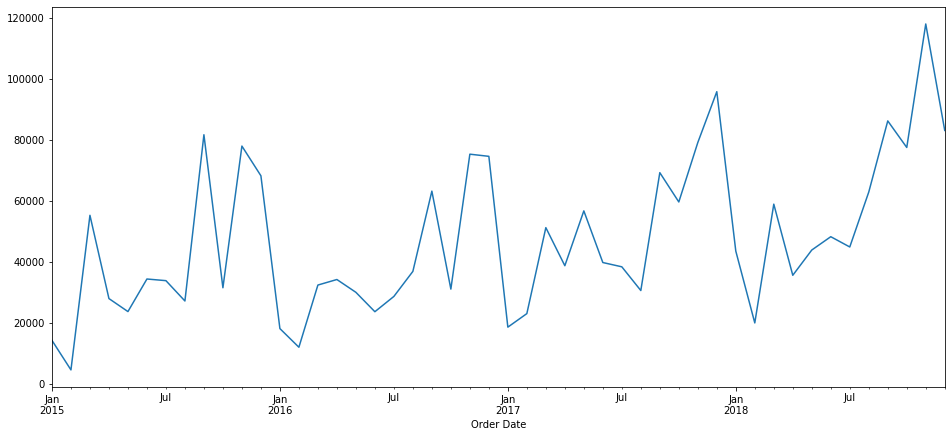

In [ ]:
data = d_frame[['Order Date','Sales']]
data = data.sort_values('Order Date')
data = data.groupby('Order Date')['Sales'].sum().reset_index()
data = data.set_index('Order Date')

monthly = data['Sales'].resample('MS').sum()
monthly.plot(figsize = (16, 7))
plt.show()


#**Doanh thu trung bình trong 3 tháng gần nhất**

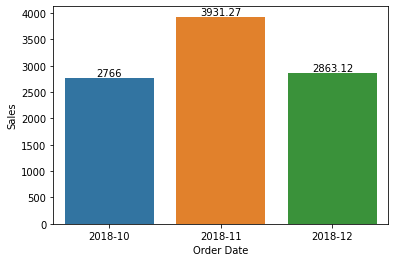

In [ ]:
threeMonth = data['Sales'].resample('MS').mean()[-3:]

threeMonth = threeMonth.reset_index()
threeMonth['Order Date'] = pd.to_datetime(threeMonth['Order Date']).dt.strftime('%Y-%m')
ax = sns.barplot(x = threeMonth['Order Date'], y = threeMonth.Sales, estimator=np.sum, ci = None)
plt.bar_label(ax.containers[0])
plt.show()


#**Doanh số bán hàng theo quý và quý có tổng doanh số cao nhất**

Text(15, 15, 'Highest Sale')

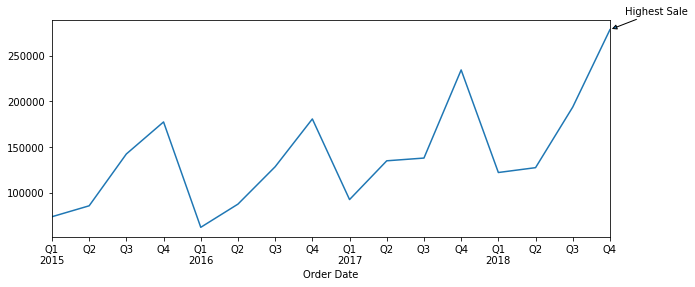

In [ ]:
data = d_frame.copy()
data['Order Date'] = pd.to_datetime(data['Order Date']).dt.strftime('%Y-%m-01')
F = data.groupby(['Order Date'])['Sales'].sum().sort_index(ascending=True)  
F = pd.DataFrame(F)
F.index = pd.to_datetime(F.index)

Q = F.groupby(F.index.to_period('Q'))['Sales'].sum().sort_index(ascending=True)
ax = Q.plot(figsize=(10,4))
Q.index = pd.Index(Q.index)
ticks = F.index[F.index.month%3 == 1]
labels = [f'Q{int(ts.month/3)+1}\n{ts.year}' if ts.month == 1
          else f'Q{int(ts.month/3)+1}' for ts in ticks]

ax.set_xticks(ticks)
ax.set_xticks(Q.index, minor=True)
ax.set_xticklabels(labels)

ax.annotate('Highest Sale',
             (Q.index[-1], Q.values[-1]),
             xytext=(15, 15), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='-|>'))


In [ ]:
'''
Q = data.groupby(data.index.to_period('Q'))['Sales'].sum().sort_index(ascending=True)

ax = Q.plot(figsize=(15,6))
Q.index = pd.Index(Q.index)
ticks = data.index[data.index.month%3 == 1]
labels = [f'Q{int(ts.month/3)+1}\n{ts.year}' if ts.month == 1
          else f'Q{int(ts.month/3)+1}' for ts in ticks]

ax.set_xticks(ticks)
ax.set_xticks(Q.index, minor=True)
ax.set_xticklabels(labels)

ax.annotate('Highest Sale',
             (Q.index[-1], Q.values[-1]),
             xytext=(15, 15), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='-|>'))
'''             

"\nQ = data.groupby(data.index.to_period('Q'))['Sales'].sum().sort_index(ascending=True)\n\nax = Q.plot(figsize=(15,6))\nQ.index = pd.Index(Q.index)\nticks = data.index[data.index.month%3 == 1]\nlabels = [f'Q{int(ts.month/3)+1}\n{ts.year}' if ts.month == 1\n          else f'Q{int(ts.month/3)+1}' for ts in ticks]\n\nax.set_xticks(ticks)\nax.set_xticks(Q.index, minor=True)\nax.set_xticklabels(labels)\n\nax.annotate('Highest Sale',\n             (Q.index[-1], Q.values[-1]),\n             xytext=(15, 15), \n             textcoords='offset points',\n             arrowprops=dict(arrowstyle='-|>'))\n"

#**Thời gian giao hàng trung bình theo tháng**

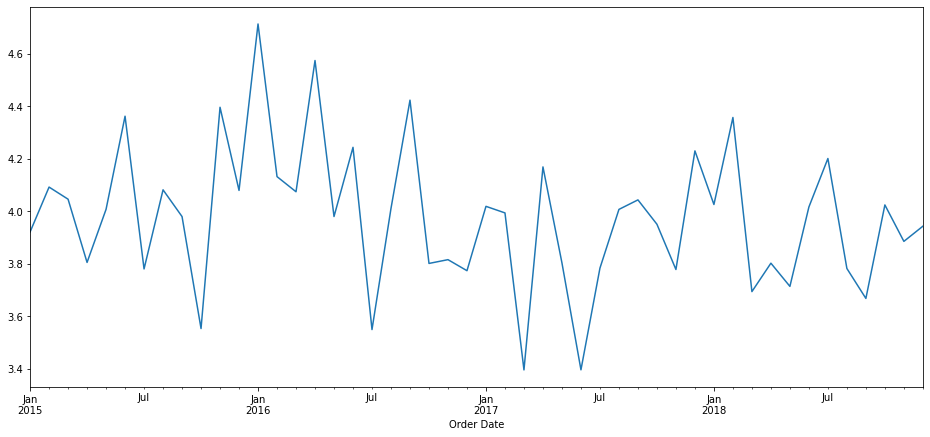

In [ ]:
data = d_frame[['Order Date','Ship Date']]
data['Ship Time'] = (data['Ship Date'] - data['Order Date']).dt.days
data = data.sort_values('Order Date')
data = data.groupby('Order Date')['Ship Time'].mean().reset_index()
data = data.set_index('Order Date')

monthly = data['Ship Time'].resample('MS').mean()
monthly.plot(figsize = (16, 7))
plt.show()


#**Sức mua theo từng thành phố**

In [ ]:
'''
data = d_frame.groupby(['City', 'Order Date'])['Sales'].sum().sort_index(ascending=False)

print(type(data))
print(data)
data = pd.DataFrame(data)

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')  # Tạo ra 1 cái khung cho biểu đồ.
plt.plot(data.iloc[0:10,0])  # Biểu đồ cho từng tiểu bang. Lấy dữ liệu theo hàng i, cột từ 1 đến hết (-1). cột 0 là state_id.
                                                      # F.index[i] là lấy giá trị của cột state_id (cột 0) có giá trị là: [CA, TX, WI]
plt.legend(loc='best')                  # Phần chú thích ở góc trên bên phải.
plt.show()
'''

"\ndata = d_frame.groupby(['City', 'Order Date'])['Sales'].sum().sort_index(ascending=False)\n\nprint(type(data))\nprint(data)\ndata = pd.DataFrame(data)\n\nplt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')  # Tạo ra 1 cái khung cho biểu đồ.\nplt.plot(data.iloc[0:10,0])  # Biểu đồ cho từng tiểu bang. Lấy dữ liệu theo hàng i, cột từ 1 đến hết (-1). cột 0 là state_id.\n                                                      # F.index[i] là lấy giá trị của cột state_id (cột 0) có giá trị là: [CA, TX, WI]\nplt.legend(loc='best')                  # Phần chú thích ở góc trên bên phải.\nplt.show()\n"

#**3 thành phố có doanh số thấp nhất và 3 thành phố có doanh sô cao nhất**

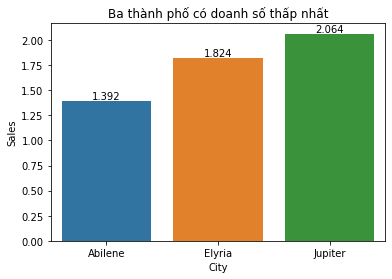

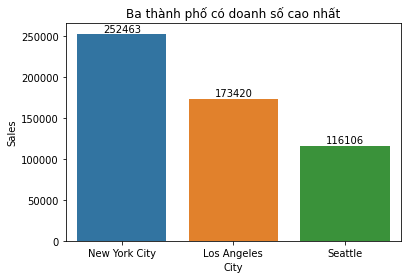

In [ ]:
lowests = d_frame.groupby('City')['Sales'].sum().sort_values(ascending=True).head(3)
highests = d_frame.groupby('City')['Sales'].sum().sort_values(ascending=False).head(3)

lowests = lowests.reset_index()
ax = sns.barplot(x = lowests.City, y = lowests.Sales, estimator=np.sum, ci = None)

plt.bar_label(ax.containers[0])
ax.set(title='Ba thành phố có doanh số thấp nhất')
plt.show()


highests = highests.reset_index()
ax = sns.barplot(x = highests.City, y = highests.Sales, estimator=np.sum, ci = None)

plt.bar_label(ax.containers[0])
ax.set(title='Ba thành phố có doanh số cao nhất')
plt.show()


#**Tỉ trọng doanh số theo bang (state) và trung bình doanh số của 5 bang dẫn đầu về sức mua**

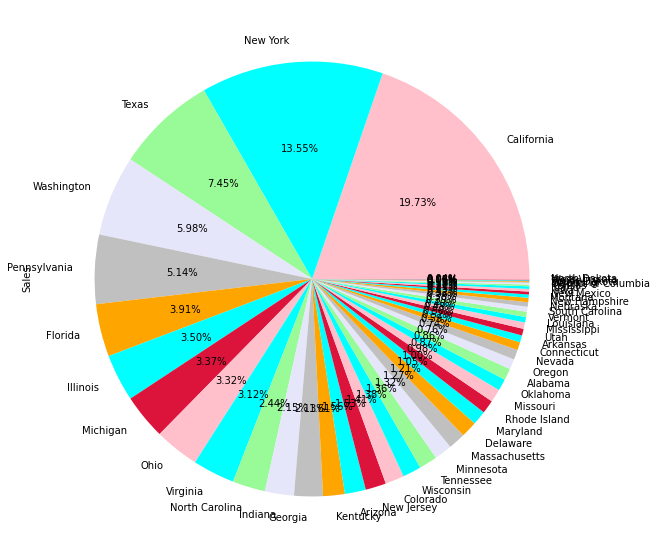

In [ ]:
data = d_frame.groupby("State").Sales.sum().sort_values(ascending=False)

data.plot(kind = "pie",
          colors = ["pink", "cyan", "palegreen", "lavender", "silver", "orange", "aqua", "crimson"],
          figsize = (12,10),
          autopct = "%.2f%%");

#**Các bang dẫn đầu doanh số theo từng vùng (east, west, south, central,..).**

<class 'pandas.core.frame.DataFrame'>


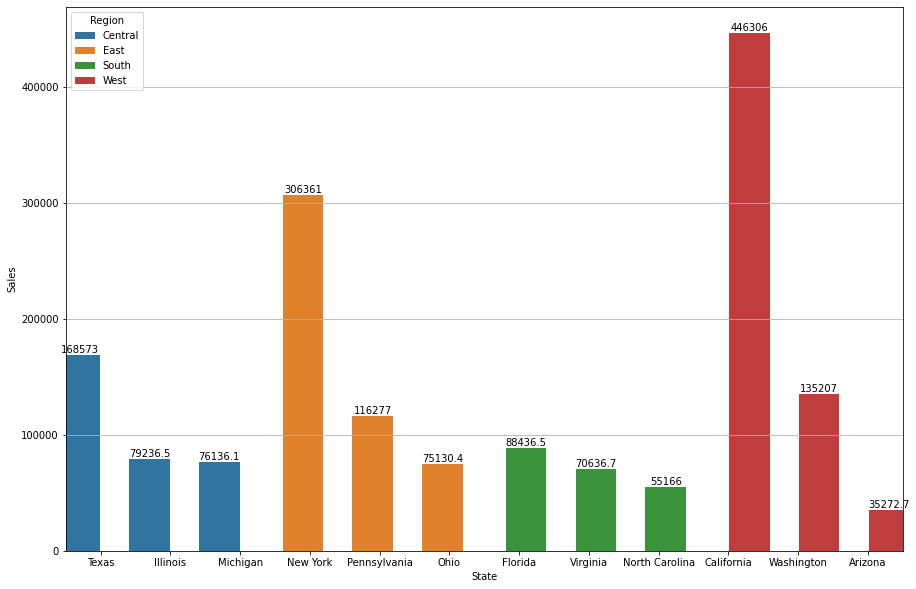

In [ ]:
data = d_frame.groupby(["Region", 'State']).agg({'Sales':sum})
g = data['Sales'].groupby('Region', group_keys=False)
g = g.nlargest(3).reset_index()
print(type(g))
plt.figure(figsize = (15,10))
ax = sns.barplot(x = g.State, y = g.Sales, hue = g.Region, ci = None, estimator=np.sum)
for i in ax.containers :
    plt.bar_label(i);

def width_changer(axi, new_value):
    for patch in axi.patches :
        cur_width = patch.get_width()
        diff = cur_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)


plt.legend(loc = 'upper left', title = 'Region')
width_changer(ax, .58)
ax.grid(axis='y')
plt.show()    

#**Top 3 sản phẩm có doanh thu cao nhất và top 3 sản phẩm có số lượng đơn vị bán ra cao nhất.**

**Top 3 sản phẩm có doanh thu cao nhất**

[Text(0, 0, '61599.8'), Text(0, 0, '27453.4'), Text(0, 0, '22638.5')]

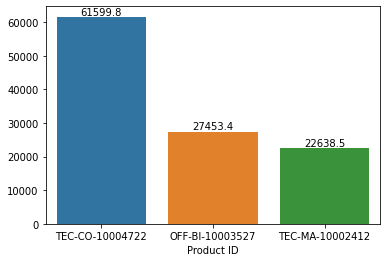

In [ ]:
data = d_frame.groupby("Product ID").Sales.sum().sort_values(ascending=False)
ax = sns.barplot(x = data[:3].index, y = data[:3].values, estimator=np.sum, ci = None)
plt.bar_label(ax.containers[0])
#ax.grid(axis='y')



**Top 3 sản phẩm có số lượng đơn vị bán ra cao nhất**

[Text(0, 0, '19'), Text(0, 0, '18'), Text(0, 0, '16')]

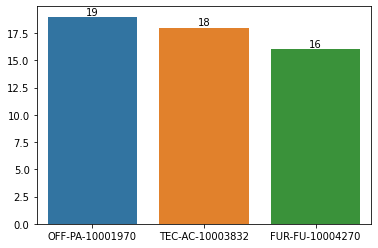

In [ ]:
data = d_frame['Product ID'].value_counts().sort_values(ascending=False)
ax = sns.barplot(x = data[:3].index, y = data[:3].values, estimator=np.sum, ci = None)
plt.bar_label(ax.containers[0])

#**Biểu đồ thể hiện tỉ trọng doanh số của từng category.**

<AxesSubplot:ylabel='Sales'>

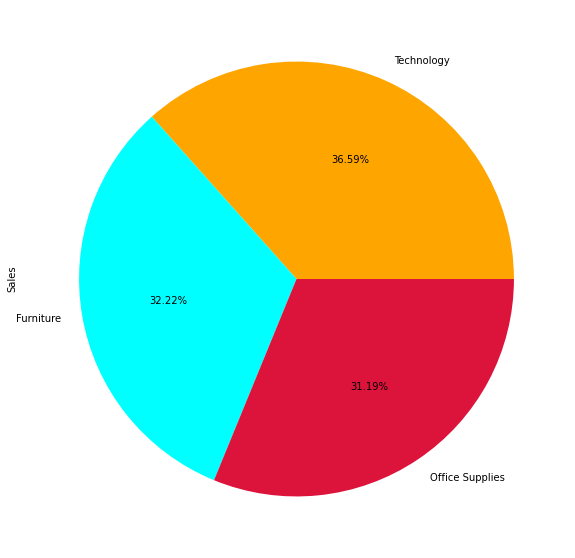

In [ ]:
data = d_frame.groupby("Category").Sales.sum().sort_values(ascending=False)
#ax = sns.barplot(x = data.index, y = data.values)
data.plot(kind = "pie",
          colors = ["orange", "aqua", "crimson"],
          figsize = (12,10),
          autopct = "%.2f%%")

#**Dự báo doanh số theo nhiều khía cạnh khác nhau trong tương lai: theo vùng, theo bang, theo category,..**

In [ ]:
!pip install pystan==2.19.1.1
!pip install fbprophet==0.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 1.2 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.5 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638721 sha256=a686bf0e7376c23e18a8c1ebc1df49bb3df00ec38adf21f748a71ce6fe578844
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
from fbprophet import Prophet

In [ ]:
sales_prophet = d_frame[["Region", "Order Date","Sales"]]
sales_prophet

,Region,Order Date,Sales
0,South,2017-11-08,261.9600
1,South,2017-11-08,731.9400
2,West,2017-06-12,14.6200
3,South,2016-10-11,957.5775
4,South,2016-10-11,22.3680
...,...,...,...
9795,Central,2017-05-21,3.7980
9796,East,2016-01-12,10.3680
9797,East,2016-01-12,235.1880
9798,East,2016-01-12,26.3760


In [ ]:
sales_prophet  = sales_prophet.rename(columns = {'Order Date': 'ds', 'Region': 'R','Sales': 'y'})
sales_prophet

,R,ds,y
0,South,2017-11-08,261.9600
1,South,2017-11-08,731.9400
2,West,2017-06-12,14.6200
3,South,2016-10-11,957.5775
4,South,2016-10-11,22.3680
...,...,...,...
9795,Central,2017-05-21,3.7980
9796,East,2016-01-12,10.3680
9797,East,2016-01-12,235.1880
9798,East,2016-01-12,26.3760


In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(sales_prophet)

In [ ]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-03,61.386629,-969.631514,1463.729644,61.386629,61.386629,181.460216,181.460216,181.460216,179.756829,...,1.382643,1.382643,1.382643,0.320744,0.320744,0.320744,0.0,0.0,0.0,242.846845
1,2015-01-04,61.392049,-1026.875558,1480.053346,61.392049,61.392049,167.572838,167.572838,167.572838,179.756829,...,-10.709189,-10.709189,-10.709189,-1.474802,-1.474802,-1.474802,0.0,0.0,0.0,228.964887
2,2015-01-05,61.397469,-993.763764,1414.122592,61.397469,61.397469,161.680802,161.680802,161.680802,179.756829,...,-15.125685,-15.125685,-15.125685,-2.950342,-2.950342,-2.950342,0.0,0.0,0.0,223.078271
3,2015-01-06,61.402889,-958.011428,1369.383236,61.402889,61.402889,162.650347,162.650347,162.650347,179.756829,...,-13.066351,-13.066351,-13.066351,-4.040131,-4.040131,-4.040131,0.0,0.0,0.0,224.053236
4,2015-01-07,61.408309,-1000.620940,1404.730619,61.408309,61.408309,195.651118,195.651118,195.651118,179.756829,...,20.580753,20.580753,20.580753,-4.686463,-4.686463,-4.686463,0.0,0.0,0.0,257.059427


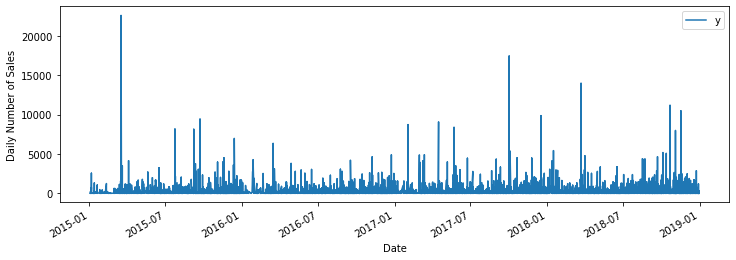

In [ ]:
ax = sales_prophet.set_index('ds').plot(figsize = (12, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

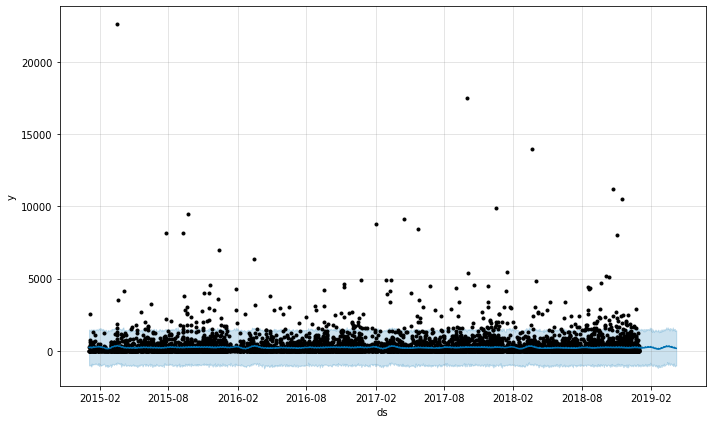

In [ ]:
first_plot = m.plot(forecast)

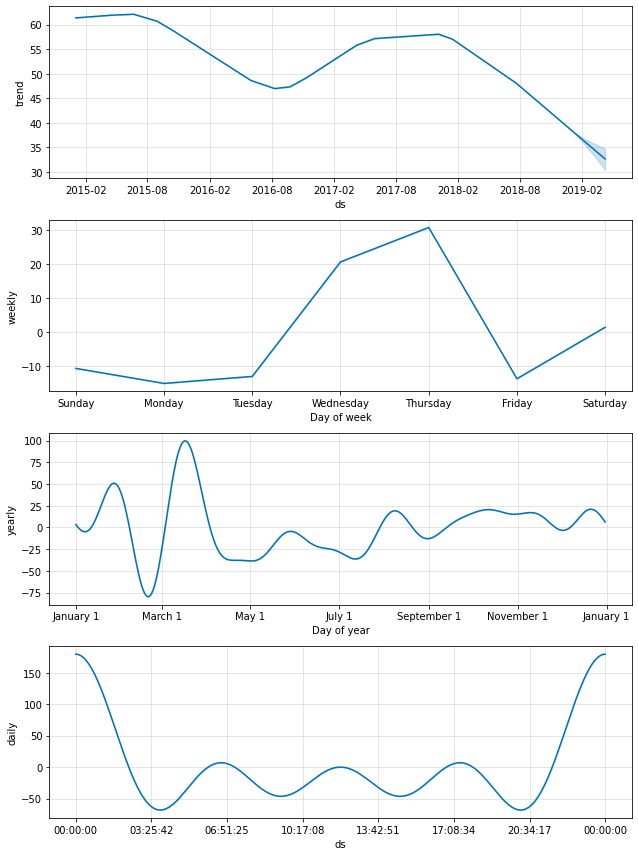

In [ ]:
second_plt2 = m.plot_components(forecast)

#**Train LSTM**

In [ ]:
d_frame.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
import os.path
from os import path
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
training_set = d_frame.sort_values(by = ['Order Date'], ascending=True).iloc[:,-1:].values
print(training_set)


In [ ]:
# Thuc hien scale du lieu gia ve khoang 0,1
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

print(training_set_scaled)

# Tao du lieu train, X = 60 time steps, Y =  1 time step
X_train = []
y_train = []
no_of_sample = len(training_set)

for i in range(60, no_of_sample):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
#print(X_train)
print(y_train)
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Xay dung model LSTM
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# Neu ton tai file model thi load
'''
trained_model = "/content/dataset/trained_model.h5"
if path.exists(trained_model):
    regressor.load_weights(trained_model)
else:
    # Con khong thi train
    regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
    regressor.save(trained_model)
'''    

'\ntrained_model = "/content/dataset/trained_model.h5"\nif path.exists(trained_model):\n    regressor.load_weights(trained_model)\nelse:\n    # Con khong thi train\n    regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)\n    regressor.save(trained_model)\n'